In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
data=pd.read_csv("Population growth in India.csv")

In [4]:
data.head()

,Sr.no,Year,IndiaPopulation,Change,Birthrate,Deathrate,WorldPopulation,Change1
0,0,1961,459.64 M,2.02%,41.7,21.7,"3,072 M",1.30%
1,1,1962,469.08 M,2.05%,41.5,21.1,"3,125 M",1.72%
2,2,1963,478.83 M,2.08%,41.2,20.6,"3,190 M",2.08%
3,3,1964,488.85 M,2.09%,40.9,20.1,"3,255 M",2.05%
4,4,1965,499.12 M,2.10%,40.6,19.6,"3,322 M",2.06%


In [5]:
data.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Sr.no,61.000000,30.000000,17.752934,0.000000,15.000000,30.000000,45.000000,60.000000
Year,61.000000,1991.000000,17.752934,1961.000000,1976.000000,1991.000000,2006.000000,2021.000000
Birthrate,60.000000,30.460000,7.783080,17.400000,23.975000,31.200000,37.275000,41.700000
Deathrate,60.000000,11.843333,4.339935,7.200000,8.075000,10.750000,14.700000,21.700000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr.no            61 non-null     int64  
 1   Year             61 non-null     int64  
 2   IndiaPopulation  61 non-null     object 
 3   Change           61 non-null     object 
 4   Birthrate        60 non-null     float64
 5   Deathrate        60 non-null     float64
 6   WorldPopulation  61 non-null     object 
 7   Change1          61 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ KB


# Data Cleaning and Preparing 

In [7]:
data[data.duplicated()]

,Sr.no,Year,IndiaPopulation,Change,Birthrate,Deathrate,WorldPopulation,Change1


In [8]:
data.isnull().sum()

Sr.no              0
Year               0
IndiaPopulation    0
Change             0
Birthrate          1
Deathrate          1
WorldPopulation    0
Change1            0
dtype: int64

<AxesSubplot:>

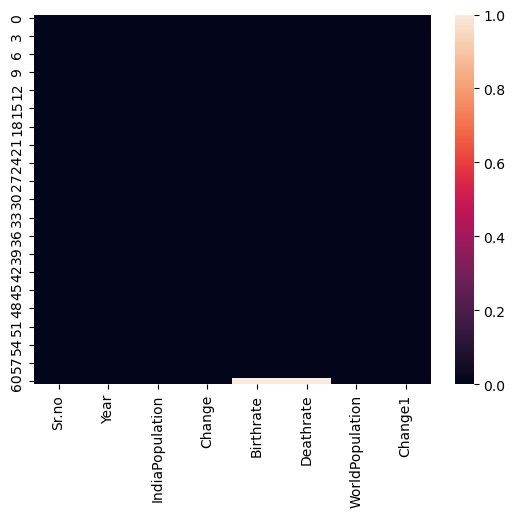

In [9]:
sns.heatmap(data.isnull())

In [10]:
data['Birthrate']=data["Birthrate"].fillna(0)
data['Deathrate']=data["Deathrate"].fillna(0)

<AxesSubplot:>

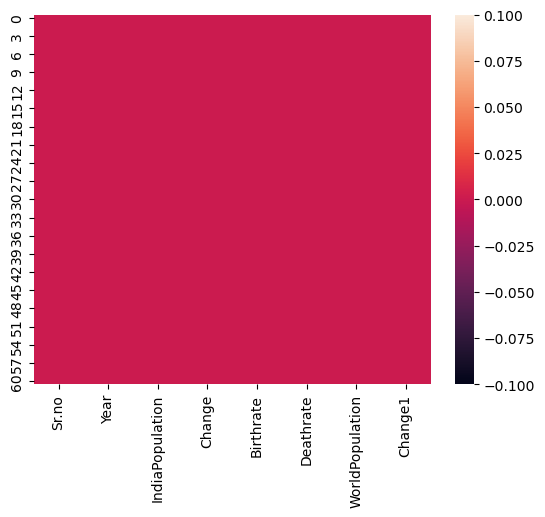

In [11]:
sns.heatmap(data.isnull())

In [12]:
data.columns

Index(['Sr.no', 'Year', 'IndiaPopulation', 'Change', 'Birthrate', 'Deathrate',
       'WorldPopulation', 'Change1'],
      dtype='object')

In [13]:
data.IndiaPopulation= data["IndiaPopulation"].str.replace("M", "")
data.IndiaPopulation= data["IndiaPopulation"].str.replace(",", "")
data.WorldPopulation=data["WorldPopulation"].str.replace("M","")
data.WorldPopulation=data["WorldPopulation"].str.replace(",","")
data.Change=data["Change"].str.replace("%","")
data.Change1=data["Change1"].str.replace("%","")

In [14]:
data["IndiaPopulation"]=data["IndiaPopulation"].astype(float)
data["WorldPopulation"]=data["WorldPopulation"].astype(float)
data["Change"]=data["Change"].astype(float)
data["Change1"]=data["Change1"].astype(float)

In [15]:
data.tail()

,Sr.no,Year,IndiaPopulation,Change,Birthrate,Deathrate,WorldPopulation,Change1
56,56,2017,1338.68,1.07,18.1,7.2,7519.0,1.15
57,57,2018,1352.64,1.04,17.9,7.2,7603.0,1.11
58,58,2019,1366.42,1.02,17.6,7.3,7684.0,1.07
59,59,2020,1380.00,0.99,17.4,7.3,7764.0,1.04
60,60,2021,1393.41,0.97,0.0,0.0,7837.0,0.94


In [16]:
data.columns

Index(['Sr.no', 'Year', 'IndiaPopulation', 'Change', 'Birthrate', 'Deathrate',
       'WorldPopulation', 'Change1'],
      dtype='object')

# Visualazation

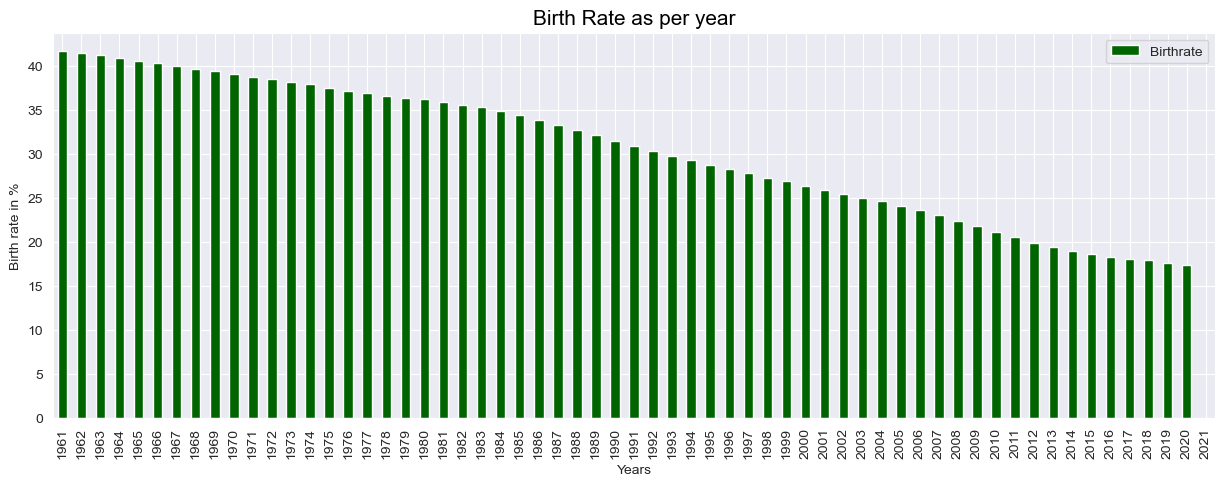

In [27]:
ax = data[['Birthrate']].plot(kind='bar',figsize=(15,5),color='darkgreen')
ax.set_xticklabels(data['Year'].values)
plt.xlabel("Years",size=10)
plt.ylabel("Birth rate in %",size=10)
plt.title("Birth Rate as per year",size=15,color='black')
sns.set_style(style="darkgrid")
plt.show()

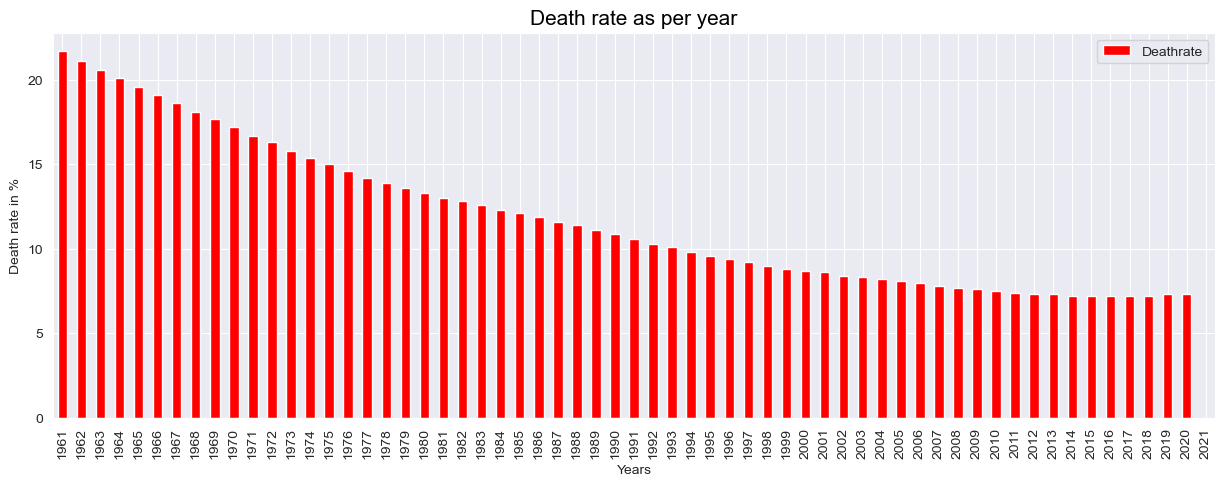

In [29]:
ax = data[['Deathrate']].plot(kind='bar',figsize=(15,5),color='red')
ax.set_xticklabels(data['Year'].values)
plt.xlabel("Years",size=10)
plt.ylabel("Death rate in %",size=10)
plt.title("Death rate as per year",size=15,color='black')
sns.set_style(style="darkgrid")
plt.show()

<Figure size 1000x500 with 0 Axes>

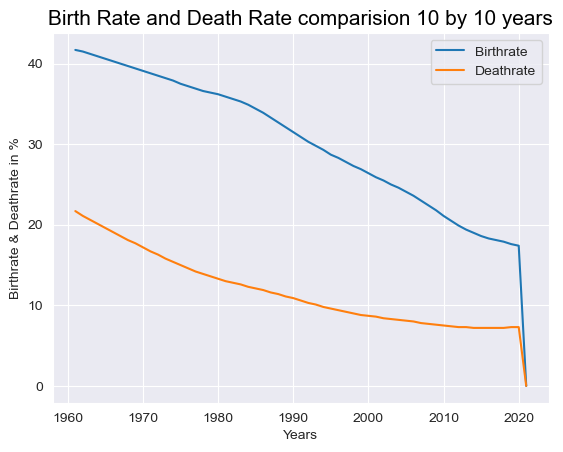

In [19]:
plt.figure(figsize=(10,5))
ax=data.plot(x='Year', y=['Birthrate','Deathrate'], kind='line')
plt.xlabel("Years",size=10)
plt.ylabel("Birthrate & Deathrate in %",size=10)
plt.title("Birth Rate and Death Rate comparision 10 by 10 years",size=15,color='black')
sns.set_style(style="darkgrid")
plt.show()

<Figure size 1500x500 with 0 Axes>

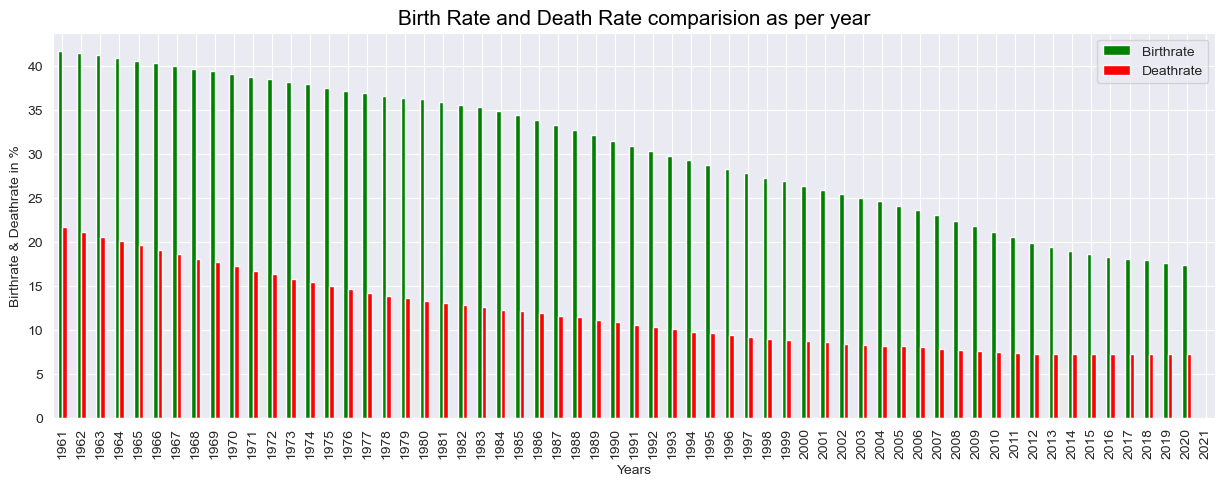

In [20]:
plt.figure(figsize=(15,5))
ax = data[['Birthrate','Deathrate']].plot(kind='bar',figsize=(15,5),color = ['green','red'])
ax.set_xticklabels(data['Year'].values)
plt.xlabel("Years",size=10)
plt.ylabel("Birthrate & Deathrate in %",size=10)
plt.title("Birth Rate and Death Rate comparision as per year",size=15,color='black')
sns.set_style(style="darkgrid")
plt.show()

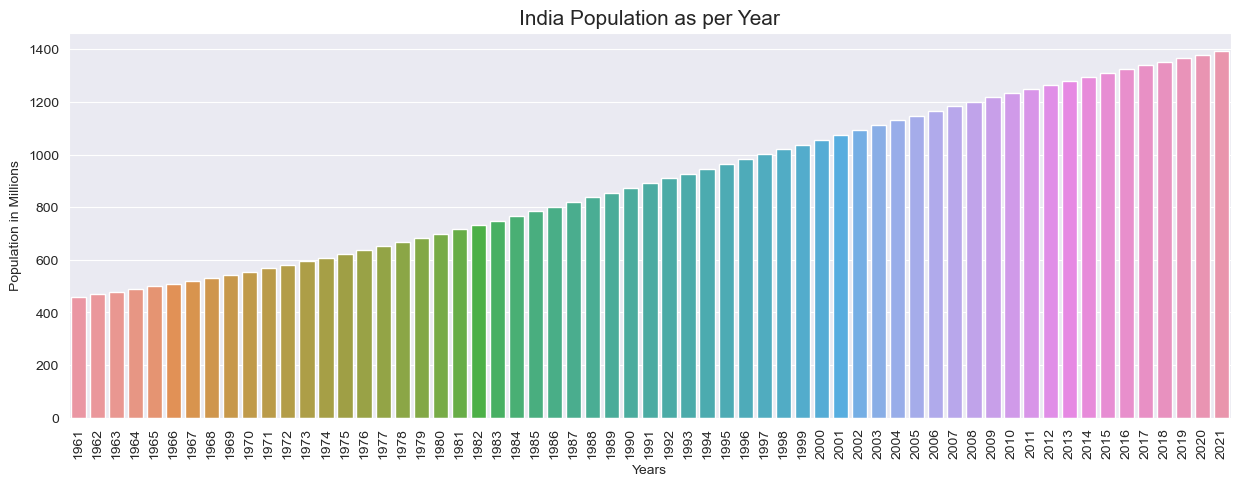

In [21]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Year',y='IndiaPopulation',data=data)
ax.set_xticklabels(data['Year'].values,rotation=90)
plt.xlabel("Years",size=10)
plt.ylabel("Population in Millions",size=10)
plt.title("India Population as per Year",size=15)
plt.show()

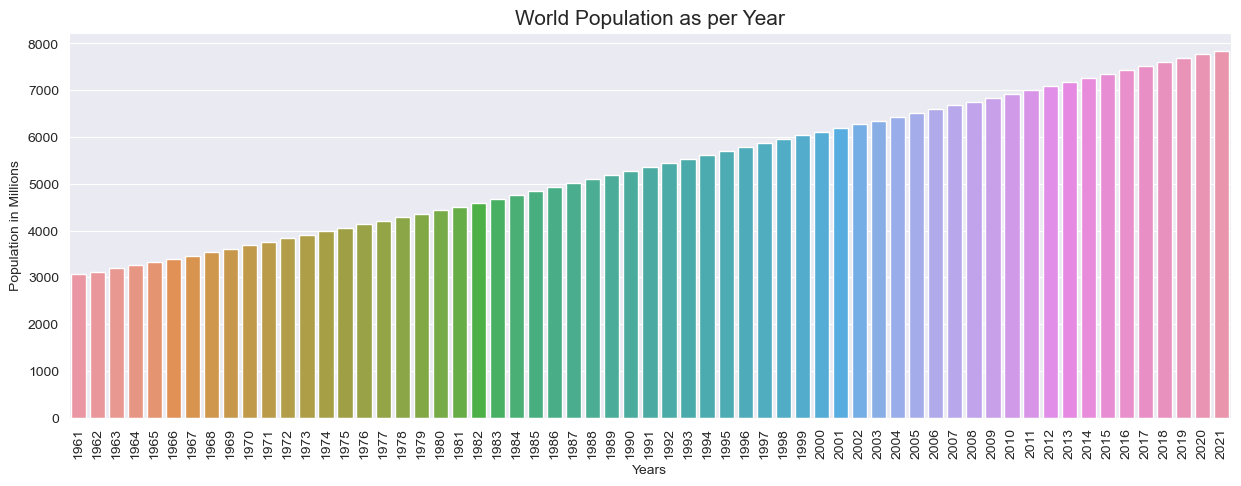

In [22]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Year',y='WorldPopulation',data=data)
ax.set_xticklabels(data['Year'].values,rotation=90)
plt.xlabel("Years",size=10)
plt.ylabel("Population in Millions",size=10)
plt.title("World Population as per Year",size=15)
plt.show()

<Figure size 1000x500 with 0 Axes>

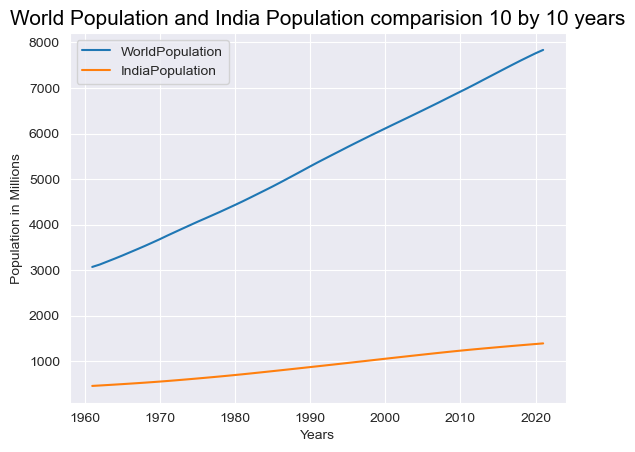

In [23]:
plt.figure(figsize=(10,5))
ax=data.plot(x='Year', y=['WorldPopulation','IndiaPopulation'], kind='line')
plt.xlabel("Years",size=10)
plt.ylabel("Population in Millions",size=10)
plt.title("World Population and India Population comparision 10 by 10 years",size=15,color='black')
sns.set_style(style="darkgrid")
plt.show()

<Figure size 1500x500 with 0 Axes>

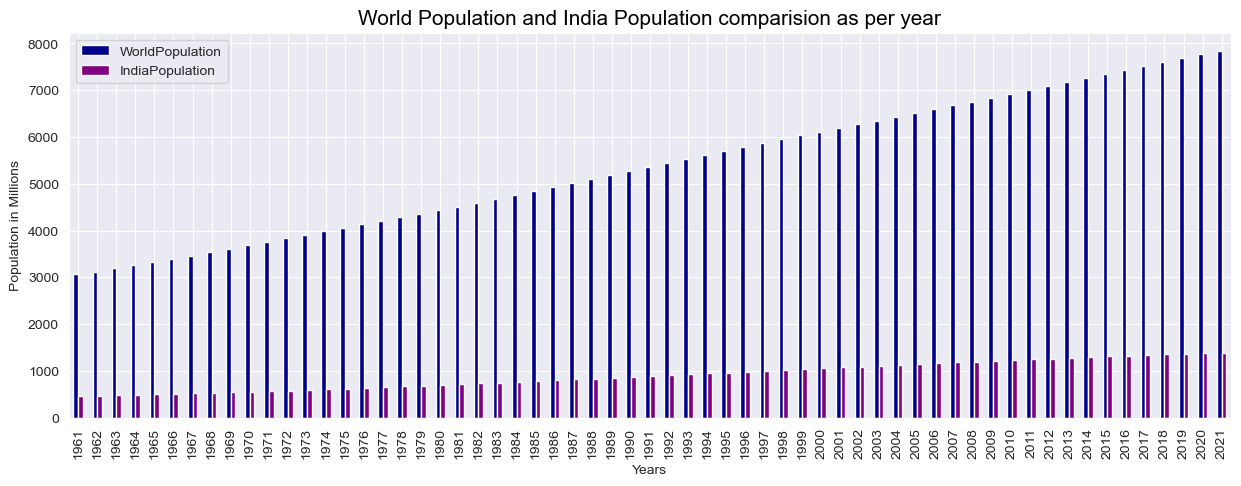

In [26]:
plt.figure(figsize=(15,5))
ax = data[['WorldPopulation','IndiaPopulation']].plot(kind='bar',figsize=(15,5),color = ['darkblue','purple'])
ax.set_xticklabels(data['Year'].values)
plt.xlabel("Years",size=10)
plt.ylabel("Population in Millions",size=10)
plt.title("World Population and India Population comparision as per year",size=15,color='black')
sns.set_style(style="darkgrid")
plt.show()